# Demonstration of basic_datasets use
 - Written for ELE 396 quantum machine learning pojects
 - clone this repo, or just download the `basic_datasets.py` module to use
 - `demo_script.ipynb` is this README in notebook form
 - demonstrates use of functions in `basic_datasets` to generate datasets and corresponding labels
 - classification datasets for toy machine learning problems, emphasis on application to quantum machine learning
 - datasets generated in this notebook are $(N \times D)$: $D$ is the dimension of each datapoint and $N$ is the number of distinct points. 
 - These can just be transposed for the opposite convention, which is what the helper functions in `basic_datasets` naturally use
 - inputs are arrays that are `x_[name]`, the associated targets are `Y_[name]`


In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from basic_datasets import *

## N-spheres
- here choosing n=2, so we are just classifying points based on the radius of the circle they lie on
- generate points on each circle `x_circle[i]`, and then combine to form a single dataset
- `Y_circle1` are class labels for corresponding points in `x_circle`, as colored in the plot below
- example: https://journals.aps.org/prapplied/abstract/10.1103/PhysRevApplied.14.034034


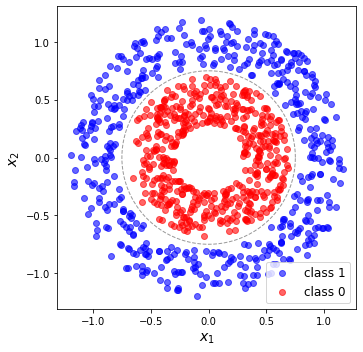

In [135]:
# circles dataset

#parameters of noisy nspheres
D_circle = 2 # number of dimensions
N_circle = 1000 # number of total datapoints
r1, r0 = 1, 0.5 # circle radii, r1>r0
dr = 0.2 # fluctuation in circle radii
r_mid =(r1+r0)/2 # dividing boundary

# generate input set from each class
x_circle1 =  r1*Noisy_nsphere_sample(dr/r1, int(N_circle/2), ndim=D_circle).T
x_circle0 =  r0*Noisy_nsphere_sample(dr/r0, int(N_circle/2), ndim=D_circle).T
# concatenate to 1 dataset, with alternating labels
x_circle = np.dstack((x_circle1.T, x_circle0.T)).reshape(D_circle,  N_circle).T 

# class labels, assign to class 1 if in circle1, assign to class 0 in circle 0
rad_circle = np.sqrt(np.sum(x_circle**2, axis=1)) # radius of each datapoint
Y_circle = np.array(rad_circle > r_mid).astype(float) # assign to appropriate radius

# # visualize boundary
theta_plot = np.linspace(0, 2*np.pi, 100)
circ_x1bound, circ_x2bound = r_mid*np.cos(theta_plot), r_mid*np.sin(theta_plot)

# plot dataset
fig_circle, ax_circle =  plt.subplots(1, 1, figsize=(6,5))
ax_circle.plot(circ_x1bound, circ_x2bound, '--k', linewidth=1, alpha = .4)
ax_circle.scatter(x_circle[np.argwhere(Y_circle), 0], x_circle[np.argwhere(Y_circle), 1],
                  color = f'b',marker = 'o', alpha = .6, label = 'class 1')
ax_circle.scatter(x_circle[np.argwhere(Y_circle<0.5), 0], x_circle[np.argwhere(Y_circle<0.5), 1],
                  color = f'r',marker = 'o', alpha = .6, label = 'class 0')
ax_circle.set_xlabel('$x_1$', fontsize=14), ax_circle.set_ylabel('$x_2$', fontsize=14)
ax_circle.legend(fontsize=12)
ax_circle.set_aspect('equal', 'box')
fig_circle.tight_layout()


# Spirals
- same concept as circles above, a 2d dataset divided into 2 classes
- now each class is a spiral arm starting at a specified angle, below angeles are $c=0$ and $\pi$
- this is then harder to separate than the circles, which just require a radius calculation
- example: https://doi.org/10.1080/09540090701398017
- example: https://playground.tensorflow.org/

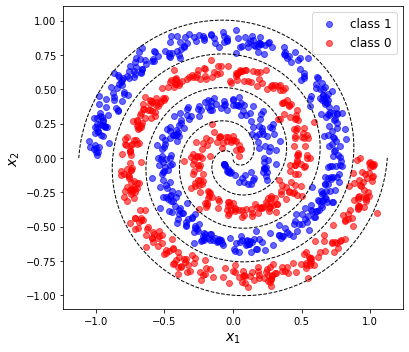

In [139]:
# Spirals dataset

#parameters of spirals
D_spiral = 2
N_spiral = 1000
cphase = [0, 1] # starting angles, units of pi
Nturns = 4 # number of pi/2 rotations per spiral arm
Sep = 0.05 # separation of arms at origin (small, poistive)
W = 0.5 # relative width of spiral arms due to noise

# generate input set from each class
x_spiral0 = Spiral_sample2(W, int(N_spiral/2), ts = cphase[0]*np.pi, Nturns = Nturns, Sep = Sep).T
x_spiral1 = Spiral_sample2(W, int(N_spiral/2), ts = cphase[1]*np.pi, Nturns = Nturns, Sep = Sep).T
# concatenate to 1 dataset, with alternating labels
x_spiral = np.dstack((x_spiral1.T, x_spiral0.T)).reshape(D_spiral,  N_spiral).T 

# class labels, assign to class 1 if in spiral 1, assign to class 0 if in spiral 0
Y_spiral = np.dstack((np.ones(int(N_spiral/2)),np.zeros(int(N_spiral/2)) )).flatten() # class 1 maps to 1, class 0 to 0


# useful functions for visualization
# define center line of each spiral
spiral_center0 = Spiral_line(int(N_spiral/2), ts = cphase[0]*np.pi, Nturns = Nturns, Sep = Sep)
spiral_center1 = Spiral_line(int(N_spiral/2), ts = cphase[1]*np.pi, Nturns = Nturns, Sep = Sep)
# normalise centers
Spiral_length = np.max([np.max(np.abs(spiral_center0)), np.max(np.abs(spiral_center0))])
spiral_center0, spiral_center1 = spiral_center0/Spiral_length, spiral_center1/ Spiral_length
# separating lines
spiral_mid1 = Spiral_line(int(N_spiral/2), ts = np.mean(cphase)*np.pi, Nturns = Nturns+.5, Sep = Sep)/ Spiral_length
spiral_mid2 = Spiral_line(int(N_spiral/2), ts = (np.mean(cphase)-1)*np.pi, Nturns = Nturns+.5, Sep = Sep)/ Spiral_length

fig_spiral, ax_spiral =  plt.subplots(1, 1, figsize=(6,5))

ax_spiral.scatter(x_spiral[np.argwhere(Y_spiral), 0], x_spiral[np.argwhere(Y_spiral), 1],
                  color = f'b',marker = 'o', alpha = .6, label = 'class 1')
ax_spiral.scatter(x_spiral[np.argwhere(Y_spiral<0.5), 0], x_spiral[np.argwhere(Y_spiral<0.5), 1],
                  color = f'r',marker = 'o', alpha = .6, label = 'class 0')
ax_spiral.plot(spiral_mid1[0], spiral_mid1[1], '--k', linewidth=1)
ax_spiral.plot(spiral_mid2[0], spiral_mid2[1], '--k', linewidth=1)
ax_spiral.set_xlabel('$x_1$', fontsize=14), ax_spiral.set_ylabel('$x_2$', fontsize=14)
ax_spiral.legend(fontsize=12)
ax_spiral.set_aspect('equal', 'box')
fig_spiral.tight_layout()


## Bars and Stripes
- this is another popular dataset for quantum machine learning because it is small and binary valued
- dataset consists of 16 4-bit binary strings (
- they are classified as to whether they contain a bar/stripe (exactly one row/column of 1s) or not
- some different definitions exist in liturature, can just change target labelling appropriately
- example: https://www.nature.com/articles/s41534-019-0157-8
- example: https://iopscience.iop.org/article/10.1088/2058-9565/abb8e4


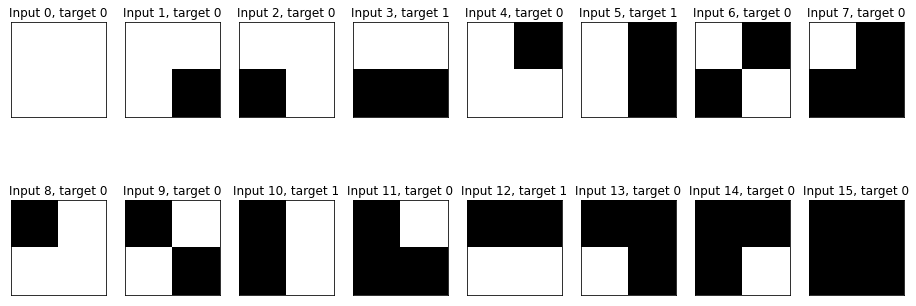

In [19]:
#BAS dataset
# input
BAS_data = [[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1],
            [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1],
            [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1],
            [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]
x_BAS = np.array(BAS_data) #dataset
(N_BAS, D_BAS) = x_BAS.shape

# labelling strings
xstr_BAS = [str(key) for key in x_BAS] 
xstr_BAS_binary = [ind for ind in range(len(xstr_BAS))]

# array of target outputs - class labels
Y_BAS = np.array([0, 0, 0, 1,
                0, 1, 0, 0,
                0, 0, 1, 0,
                1, 0, 0, 0])


#generate quick image of BAS data
BAS_images = []
for q in range(N_BAS):
    BAS_images.append(np.array(BAS_data[q]).reshape(2,2))
cutfact = 2
fig_BAS, ax_BAS = plt.subplots(cutfact,int(N_BAS/cutfact), figsize=(16,6))
ax_BAS = ax_BAS.flatten()
for q in range(N_BAS):
    ax_BAS[q].matshow(BAS_images[q], cmap = 'binary', alpha = 1, clim = [0,1])
    ax_BAS[q].set(xticklabels = [], yticklabels = [], xticks = [], yticks = [])
    ax_BAS[q].set_title(f"Input {q}, target {Y_BAS[q]}")